In [ ]:
import pandas as pd
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
import math
from sklearn.metrics import jaccard_score

In [ ]:
# Load the benign, malicious and modified malicious data sets after a training of 50 epochs
data_benign_r1 = pd.read_csv('data/run1/benign.dat', header=None, sep=',')
print("Benign data loaded")
data_mal_r1 = pd.read_csv('data/run1/malicious.dat', header=None, sep=',')
print("Malicious data loaded")
data_mal_mod_r1 = pd.read_csv('data/run1/malicious_modified.dat', header=None, sep=',')
print("Malicious modified data loaded")

In [57]:
# Load the benign, malicious and modified malicious data sets after training 50 epochs twice, including loaded model weights
data_benign_r3 = pd.read_csv('data/run3/benign.dat', header=None, sep=',')
print("Benign data loaded")
data_mal_r3 = pd.read_csv('data/run3/malicious.dat', header=None, sep=',')
print("Malicious data loaded")
data_mal_mod_r3 = pd.read_csv('data/run3/malicious_modified.dat', header=None, sep=',')
print("Malicious modified data loaded")

Benign data loaded
Malicious data loaded
Malicious modified data loaded


In [58]:
print(data_benign_r1.shape)
print(data_mal_r1.shape)
print(data_mal_mod_r1.shape)

print(data_benign_r3.shape)
print(data_mal_r3.shape)
print(data_mal_mod_r3.shape)

(30729, 22761)
(30729, 22761)
(30728, 22761)
(30000, 22761)
(30000, 22761)
(30000, 22761)


In [19]:
# Compare Benign to Malicious data for run 1
cosine_similarities = []
jacard_similarities = []
for i in range(len(data_benign_r1.columns)):
    cos_sim = 1 - spatial.distance.cosine(data_benign_r1[i], data_mal_r1[i])
    jac_score = jaccard_score(data_benign_r1[i], data_mal_r1[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
        
    if math.isnan(jac_score):
        jacard_similarities.append(0)
    else:
        jacard_similarities.append(jac_score)
print("Cosine similarity between benign and malicious " + str(np.mean(cosine_similarities)))
print("Jaccard similarity between benign and malicious " + str(np.mean(jacard_similarities)))


/Users/jbambacht/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/Users/jbambacht/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cosine similarity between malicious and modififed malicious 0.004588188668526045
Jaccard similarity between malicious and modififed malicious 0.0025618437315835124


In [50]:
# Compare Malicious and modified Malicious data for run 1
cosine_similarities = []
jacard_similarities = []
for i in range(len(data_mal_r1.columns)):
    cos_sim = 1 - spatial.distance.cosine(data_mal_r1[i][:-1], data_mal_mod_r1[i])
    jac_score = jaccard_score(data_mal_r1[i][:-1], data_mal_mod_r1[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
        
    if math.isnan(jac_score):
        jacard_similarities.append(0)
    else:
        jacard_similarities.append(jac_score)
print("Cosine similarity between malicious and modififed malicious " + str(np.mean(cosine_similarities)))
print("Jaccard similarity between malicious and modififed malicious " + str(np.mean(jacard_similarities)))



/Users/jbambacht/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Cosine similarity between malicious and modififed malicious 0.005601622184094457
Jaccard similarity between malicious and modififed malicious 0.003287644425983657


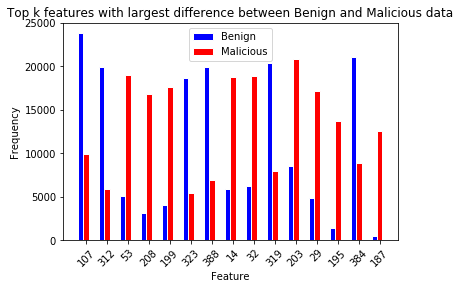

In [51]:
import familiarization as fm
# Compute the summation of each column/feature
sum_column_benign = data_benign_r1.sum(axis = 0, skipna = True)
sum_column_mal = data_mal_r1.sum(axis = 0, skipna = True)

# Difference between benign and malicious
diff_benign_mal = abs(sum_column_benign - sum_column_mal)
diff_benign_mal = diff_benign_mal.sort_values(ascending=False)

# Define limit for plot
limit_top_x = 15

# Create dataframe for plotting
plot_df = pd.DataFrame()
plot_df_mal = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_benign_mal.index[i]
    columns.append(cur_feature_name)
    plot_df[cur_feature_name] = data_benign_r1[cur_feature_name] 
    plot_df_mal[cur_feature_name] = data_mal_r1[cur_feature_name] 

# Plot the data
fm.bar_plot(plot_df, plot_df_mal, columns, "Benign", "Malicious")

In [52]:
# Difference between benign and malicious
total = diff_benign_mal.shape[0]
df = pd.DataFrame()
df['difference'] = diff_benign_mal.value_counts().index
df['percentage'] = diff_benign_mal.value_counts() / total
df = df.sort_values('difference')
df = df.head(10)

df

,difference,percentage
0,0.0,0.834014
10,1.0,NaN
36,2.0,NaN
232,3.0,NaN
231,4.0,NaN
414,42.0,NaN
513,46.0,0.000176
184,47.0,NaN
8,50.0,NaN
1,51.0,0.002153


In [ ]:
print("Comparing the k most features with less than k changes for the benign and malicious data set, shows us that " +  str(round(df['percentage'].sum() * 100, 3)) + "% of data only differ at most 10 values")

In [ ]:
# Sum values of each column
sum_column_mal = data_mal_r1.sum(axis = 0, skipna = True)
sum_column_mod = data_mal_mod_r1.sum(axis = 0, skipna = True)

# Difference between  malicious and modified malicious
diff_mod_mal = abs(sum_column_mod - sum_column_mal)
diff_mod_mal = diff_mod_mal.sort_values(ascending=False)

# Create dataframe for plotting
plot_df_mal = pd.DataFrame()
plot_df_mod = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_mod_mal.index[i]
    columns.append(cur_feature_name)
    plot_df_mal[cur_feature_name] = data_mal_r1[cur_feature_name] 
    plot_df_mod[cur_feature_name] = data_mal_mod_r1[cur_feature_name] 

# Plot the data
fm.bar_plot(plot_df_mal, plot_df_mod, columns, "Malicious", "Malicious modified")

In [ ]:
total = diff_benign_mal.shape[0]
df = pd.DataFrame()
df['difference'] = diff_mod_mal.value_counts().index
df['percentage'] = diff_mod_mal.value_counts() / total
df = df.sort_values('difference')
df = df.head(10)
df

In [ ]:
print("Comparing the k most features with less than k changes for the malicious and modified malicious data set, shows us that " +  str(round(df['percentage'].sum() * 100, 3)) + "% of data only differ at most 10 values")

In [59]:
# Compare Benign to Malicious data for run 3
cosine_similarities = []
jacard_similarities = []
for i in range(len(data_benign_r3.columns)):
    cos_sim = 1 - spatial.distance.cosine(data_benign_r3[i], data_mal_r3[i])
    jac_score = jaccard_score(data_benign_r3[i], data_mal_r3[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
        
    if math.isnan(jac_score):
        jacard_similarities.append(0)
    else:
        jacard_similarities.append(jac_score)
print("Cosine similarity between benign and malicious " + str(np.mean(cosine_similarities)))
print("Jaccard similarity between benign and malicious " + str(np.mean(jacard_similarities)))


/Users/jbambacht/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/Users/jbambacht/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cosine similarity between benign and malicious 0.0045059890374956725
Jaccard similarity between benign and malicious 0.0025237724705769165


In [60]:
# Compare Malicious and modified Malicious data for run 3
cosine_similarities = []
jacard_similarities = []
for i in range(len(data_mal_r3.columns)):
    cos_sim = 1 - spatial.distance.cosine(data_mal_r3[i], data_mal_mod_r3[i])
    jac_score = jaccard_score(data_mal_r3[i], data_mal_mod_r3[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
        
    if math.isnan(jac_score):
        jacard_similarities.append(0)
    else:
        jacard_similarities.append(jac_score)
print("Cosine similarity between malicious and modififed malicious " + str(np.mean(cosine_similarities)))
print("Jaccard similarity between malicious and modififed malicious " + str(np.mean(jacard_similarities)))




Cosine similarity between malicious and modififed malicious 0.1544811385229936
Jaccard similarity between malicious and modififed malicious 0.15194242772704086


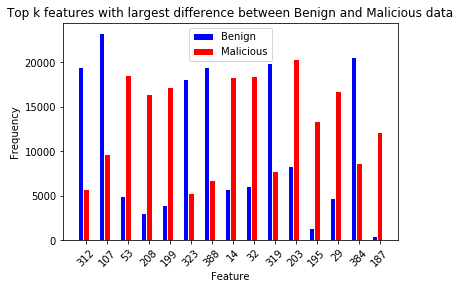

In [61]:
import familiarization as fm
# Compute the summation of each column/feature
sum_column_benign = data_benign_r3.sum(axis = 0, skipna = True)
sum_column_mal = data_mal_r3.sum(axis = 0, skipna = True)

# Difference between benign and malicious
diff_benign_mal = abs(sum_column_benign - sum_column_mal)
diff_benign_mal = diff_benign_mal.sort_values(ascending=False)

# Define limit for plot
limit_top_x = 15

# Create dataframe for plotting
plot_df = pd.DataFrame()
plot_df_mal = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_benign_mal.index[i]
    columns.append(cur_feature_name)
    plot_df[cur_feature_name] = data_benign_r3[cur_feature_name] 
    plot_df_mal[cur_feature_name] = data_mal_r3[cur_feature_name] 

# Plot the data
fm.bar_plot(plot_df, plot_df_mal, columns, "Benign", "Malicious")

In [62]:
# Difference between benign and malicious
total = diff_benign_mal.shape[0]
df = pd.DataFrame()
df['difference'] = diff_benign_mal.value_counts().index
df['percentage'] = diff_benign_mal.value_counts() / total
df = df.sort_values('difference')
df = df.head(10)

df

,difference,percentage
0,0.0,0.836606
1,50.0,NaN
2,100.0,NaN
3,150.0,NaN
4,200.0,NaN
5,250.0,NaN
6,300.0,NaN
7,350.0,NaN
8,400.0,NaN
9,450.0,NaN


In [63]:
print("Comparing the k most features with less than k changes for the benign and malicious data set, shows us that " +  str(round(df['percentage'].sum() * 100, 3)) + "% of data only differ at most 10 values")

Comparing the k most features with less than k changes for the benign and malicious data set, shows us that 83.661% of data only differ at most 10 values
